In [14]:
import numpy as np 
from collections import Counter 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.utils import shuffle 

## 导入数据集

In [15]:
# 导入 iris dataset 
iris = datasets.load_iris() 

In [16]:
iris.data 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
iris.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X,y = shuffle(iris.data, iris.target, random_state = 13) 

In [19]:
#数据转换为float32 格式 
X = X.astype('float32') 

## 划分训练集，测试集

In [20]:
# 划分训练集测试集，比例为7:3 
offset = int(X.shape[0]*0.7) 
X_train,y_train = X[:offset],y[:offset] 
X_test,y_test = X[offset:],y[offset:]  
 

In [21]:
# 将标签转为竖向量 
y_train = y_train.reshape(-1,1) 
y_test = y_test.reshape(-1,1) 

In [22]:
#打印训练集测试集大小 
print('X_train = ',X_train.shape) 
print('X_test = ',X_test.shape) 
print('y_train = ',y_train.shape) 
print('y_test = ',y_test.shape) 

X_train =  (105, 4)
X_test =  (45, 4)
y_train =  (105, 1)
y_test =  (45, 1)


## 定义欧氏距离 

矩阵的欧式距离： $$D_{ij} = ||x_i - x_j||^{2}_{2}\\ = (x_{i} - x_{j})^{T}(x_{i}-x_{j})\\ = x^{T}_{i} x_{i} + x_{j}x^{T}_{j} - 2x^{T}_{i}x_{j}$$  

In [23]:
# 定义欧式距离函数 
def compute_distances(X, X_train): 
    """
    输入： 
    X: 测试样本实例矩阵 
    X_train:训练样本实例矩阵 

    输出： 
    欧式距离 
    """
    # 测试实例样本量 
    num_test = X.shape[0] 
    # 训练实例样本量 
    num_train = X_train.shape[0] 
    # 欧氏距离初始化 
    dists = np.zeros((num_test,num_train)) 
    #测试样本与训练样本的矩阵点乘 
    M = np.dot(X,X_train.T) 
    #测试样本矩阵平方 
    te = np.square(X).sum(axis = 1)  # 按行累加 
    # 训练样本矩阵平方 
    tr = np.square(X_train).sum(axis = 1) 
    # 计算欧式距离 
    dists = np.sqrt(-2*M+tr+np.matrix(te).T)  

    return dists  


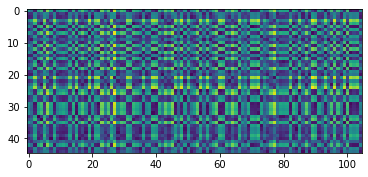

In [24]:
# 绘制欧式距离图 
dists = compute_distances(X_test,X_train) 
plt.imshow(dists,interpolation= 'none') 
plt.show() 

## 标签预测函数 

In [25]:
## 定义预测函数 
def predict_labels(y_train,dists,k=1): 
    """
    输入： 
    y_train：训练集标签 
    dists：训练集与测试集之间的欧式距离矩阵 
    k：k值 
    输出： 
    y_pred：测试集预测结果 
    """ 
    # 测试样本量 
    num_test = dists.shape[0] 
    #初始化测试集预测结果 
    y_pred = np.zeros(num_test) 
    # 遍历 
    for i in range(num_test): 
        #初始化最近邻列表 
        closet_y = [] 
        # 按欧式距离矩阵排序后取索引，并用训练集标签按排序后的索引取值 
        #最后展平列表 
        labels = y_train[np.argsort(dists[i,:])].flatten() 
        #取最近的k个值 
        closest_y = labels[0:k] 
        #对最近的k个值进行计数统计 
        c = Counter(closest_y) 
        #取计数最多的那个类别 
        y_pred[i] = c.most_common(1)[0][0] 

    return y_pred 

## 测试集预测 

In [26]:
#测试集预测结果 
y_test_pred = predict_labels(y_train,dists, k = 1) 
y_test_pred = y_test_pred.reshape(-1,1) 

# 找出预测正确的实例 
num_correct = np.sum(y_test_pred == y_test) 

#计算分类的准确率 
accuracy = float(num_correct)/X_test.shape[0] 
print('KNN Accuracy based on Numpy:', accuracy) 


KNN Accuracy based on Numpy: 0.9777777777777777


## 交叉验证寻找最优k值 

In [29]:
# 五折 
num_folds = 5 
# 候选k值 
k_choices = [1,3,5,8,10,12,15,20,50,100] 
X_train_folds = [] 
y_train_folds = [] 
# 训练数据划分 
X_train_folds = np.array_split(X_train,num_folds) 
#训练标签划分
y_train_folds = np.array_split(y_train,num_folds) 
k_to_accuracies = {} 
# 遍历所有候选k 
for k in k_choices: 
    # 五折遍历 
    for fold in range(num_folds): 
        #为传入的训练集单独划分一个验证集作为测试集 
        validation_x_test = X_train_folds[fold] 
        validation_y_test = y_train_folds[fold] 
        temp_x_train = np.concatenate(X_train_folds[:fold] + X_train_folds[fold+1:]) 
        temp_y_train = np.concatenate(y_train_folds[:fold]+y_train_folds[fold+1:]) 
        # 计算距离 
        temp_dists = compute_distances(validation_x_test,temp_x_train) 
        temp_y_test_pred = predict_labels(temp_y_train,temp_dists, k = k) 
        temp_y_test_pred = temp_y_test_pred.reshape(-1,1) 
        # 查看分类准确率 
        num_correct = np.sum(temp_y_test_pred == validation_y_test) 
        num_test = validation_x_test.shape[0] 
        accuracy = float(num_correct)/num_test 
        k_to_accuracies[k] = k_to_accuracies.get(k,[]) + [accuracy] 

# 打印不同k值，不同折数下的分类准确率 
for k in sorted(k_to_accuracies): 
    for accuracy in k_to_accuracies[k]: 
        print('k = %d,accuracy = %f' % (k,accuracy)) 

k = 1,accuracy = 0.904762
k = 1,accuracy = 1.000000
k = 1,accuracy = 0.952381
k = 1,accuracy = 0.857143
k = 1,accuracy = 0.952381
k = 3,accuracy = 0.857143
k = 3,accuracy = 1.000000
k = 3,accuracy = 0.952381
k = 3,accuracy = 0.857143
k = 3,accuracy = 0.952381
k = 5,accuracy = 0.857143
k = 5,accuracy = 1.000000
k = 5,accuracy = 0.952381
k = 5,accuracy = 0.904762
k = 5,accuracy = 0.952381
k = 8,accuracy = 0.904762
k = 8,accuracy = 1.000000
k = 8,accuracy = 0.952381
k = 8,accuracy = 0.904762
k = 8,accuracy = 0.952381
k = 10,accuracy = 0.952381
k = 10,accuracy = 1.000000
k = 10,accuracy = 0.952381
k = 10,accuracy = 0.904762
k = 10,accuracy = 0.952381
k = 12,accuracy = 0.952381
k = 12,accuracy = 1.000000
k = 12,accuracy = 0.952381
k = 12,accuracy = 0.857143
k = 12,accuracy = 0.952381
k = 15,accuracy = 0.952381
k = 15,accuracy = 1.000000
k = 15,accuracy = 0.952381
k = 15,accuracy = 0.857143
k = 15,accuracy = 0.952381
k = 20,accuracy = 0.952381
k = 20,accuracy = 1.000000
k = 20,accuracy = 0.9

## 不同k值下的分类准确率 

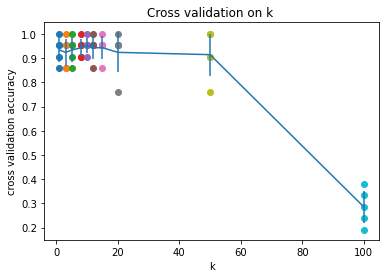

In [31]:
for k in k_choices: 
    # 取出第k个k值的分类准确率 
    accuracies = k_to_accuracies[k] 
    # 绘制不同k值下的分类准确率散点图 
    plt.scatter([k]*len(accuracies),accuracies) 
# 计算分类准确率平均值并排序 
accracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())]) 
# 计算分类准确率标准差并排序 
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())]) 
#绘制有置信区间的误差棒图 
plt.errorbar(k_choices,accracies_mean,yerr = accuracies_std) 
plt.title('Cross validation on k ') 
plt.xlabel('k') 
plt.ylabel('cross validation accuracy') 
plt.show() 

## 基于sklearn的KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier as KNN 
neigh = KNN(n_neighbors=10) 
neigh.fit(X_train,y_train) 
y_pred = neigh.predict(X_test) 
y_pred = y_pred.reshape(-1,1) 
# 计算分类的准确率
accuracy = neigh.score(X_test,y_test)  
print('KNN Accuracy based on sklearn: ,', accuracy)

KNN Accuracy based on sklearn: , 0.9777777777777777


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
